In [5]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.models import load_model

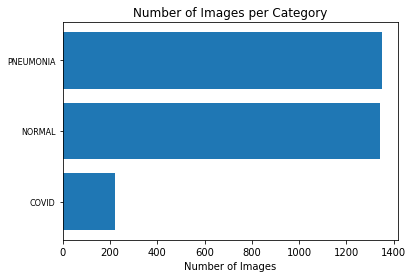

<Figure size 432x288 with 0 Axes>

In [4]:
plt.clf()
diagnosis = ["COVID", "NORMAL", "PNEUMONIA"]
num_COVID = len(os.listdir("../dataset/COVID-19"))
num_Pneumonia = len(os.listdir("../dataset/ViralPneumonia"))
num_NORMAL = len(os.listdir("../dataset/NORMAL"))
y_pos = np.arange(len(diagnosis))
plt.barh(y_pos, [num_COVID, num_NORMAL, num_Pneumonia], align='center')
plt.title("Number of Images per Category")
plt.yticks(y_pos, diagnosis, fontsize=8)
plt.xlabel("Number of Images")
plt.show()
plt.clf()

In [13]:
classifier = Sequential()
classifier.add(Conv2D(filters = 32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
classifier.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu'))
classifier.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(rate=0.25))
classifier.add(Dense(units=3, activation='softmax'))
optimizer = SGD(lr=0.01)
classifier.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
#Architecture #2
classifier = Sequential()
classifier.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(rate=0.25))
classifier.add(Dense(units=3, activation='softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Reading Images from Training, Validation, and Test Directories and converting them to tensor format
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory("../dataset/train_data", target_size=(64, 64), batch_size=32, class_mode='categorical')
validation_set = validation_datagen.flow_from_directory("../dataset/validation_data", target_size=(64, 64), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory("../dataset/test_data", target_size=(64, 64), batch_size=32, class_mode='categorical', shuffle=False)


Found 2056 images belonging to 3 classes.
Found 436 images belonging to 3 classes.
Found 448 images belonging to 3 classes.


In [14]:
history2 = classifier.fit_generator(training_set, epochs=25, steps_per_epoch=int(2056/32), validation_data=validation_set, validation_steps=436, workers=6)

Epoch 1/25
64/64 [==============================] - 287s 4s/step - loss: 0.7700 - acc: 0.6074 - val_loss: 0.4136 - val_acc: 0.8303
Epoch 2/25
64/64 [==============================] - 279s 4s/step - loss: 0.5747 - acc: 0.7544 - val_loss: 0.3409 - val_acc: 0.8830
Epoch 3/25
64/64 [==============================] - 276s 4s/step - loss: 0.4598 - acc: 0.8237 - val_loss: 0.3125 - val_acc: 0.8898
Epoch 4/25
64/64 [==============================] - 279s 4s/step - loss: 0.4423 - acc: 0.8237 - val_loss: 0.6083 - val_acc: 0.6975
Epoch 5/25
64/64 [==============================] - 275s 4s/step - loss: 0.4265 - acc: 0.8218 - val_loss: 0.2419 - val_acc: 0.9081
Epoch 6/25
64/64 [==============================] - 285s 4s/step - loss: 0.3690 - acc: 0.8618 - val_loss: 0.2456 - val_acc: 0.8990
Epoch 7/25
64/64 [==============================] - 268s 4s/step - loss: 0.3439 - acc: 0.8662 - val_loss: 0.2702 - val_acc: 0.8921
Epoch 8/25
64/64 [==============================] - 270s 4s/step - loss: 0.3182 - a

In [16]:
classifier.save("../models/Architecture1/Model.h5")
classifier.save_weights("../models/Architecture1/ModelWeights.h5")

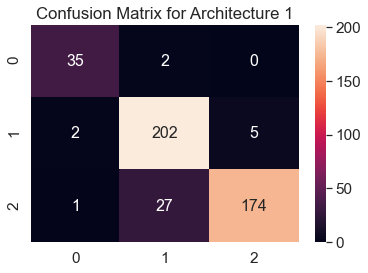

In [21]:
plt.clf()
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())
test_pred = classifier.predict_generator(test_set)
predicted_classes = np.argmax(test_pred, axis=1)
cm = confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, range(3), range(3))
pd.options.display.float_format = '%d'.format
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size" : 16}, fmt='g')
plt.title("Confusion Matrix for Architecture 1")
plt.savefig("../charts/Architecture1/confusion_matrix.jpg")

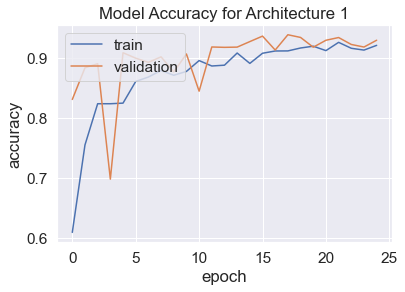

In [42]:
#Plotting Training Accuracy and Validation Accuracy vs Epoch Number
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model Accuracy for Architecture 1')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("../charts/Architecture1/train_validation_accuracy.jpg")

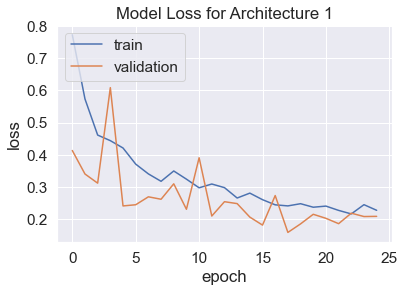

In [43]:
#Plotting Training Loss and Validation Loss vs Epoch Number
plt.clf()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss for Architecture 1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("../charts/Architecture1/train_validation_loss.jpg")

In [28]:
# Getting Precision, Recall, and Summary
from sklearn.metrics import classification_report
classification_report = classification_report(true_classes, predicted_classes)
print(classification_report)
#0 = COVID
#1 = NORMAL
#2 = VIRAL Pneumonia

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        37
           1       0.87      0.97      0.92       209
           2       0.97      0.86      0.91       202

    accuracy                           0.92       448
   macro avg       0.92      0.92      0.92       448
weighted avg       0.92      0.92      0.92       448



In [29]:
classifier = Sequential()
classifier.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(rate=0.25))
classifier.add(Dense(units=3, activation='softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = classifier.fit_generator(training_set, epochs=25, steps_per_epoch=int(2056/32), validation_data=validation_set, validation_steps=436, workers=6)

Epoch 1/25
64/64 [==============================] - 253s 4s/step - loss: 0.7879 - acc: 0.6357 - val_loss: 0.4613 - val_acc: 0.8189
Epoch 2/25
64/64 [==============================] - 259s 4s/step - loss: 0.4894 - acc: 0.7973 - val_loss: 0.5244 - val_acc: 0.7891
Epoch 3/25
64/64 [==============================] - 250s 4s/step - loss: 0.4458 - acc: 0.8286 - val_loss: 0.2825 - val_acc: 0.8968
Epoch 4/25
64/64 [==============================] - 238s 4s/step - loss: 0.3851 - acc: 0.8457 - val_loss: 0.2886 - val_acc: 0.8832
Epoch 5/25
64/64 [==============================] - 231s 4s/step - loss: 0.3616 - acc: 0.8643 - val_loss: 0.3904 - val_acc: 0.8507
Epoch 6/25
64/64 [==============================] - 234s 4s/step - loss: 0.3517 - acc: 0.8613 - val_loss: 0.2339 - val_acc: 0.9199
Epoch 7/25
64/64 [==============================] - 238s 4s/step - loss: 0.3160 - acc: 0.8857 - val_loss: 0.2604 - val_acc: 0.9038
Epoch 8/25
64/64 [==============================] - 241s 4s/step - loss: 0.3254 - a

In [31]:
classifier.save("../models/Architecture2/Model.h5")
classifier.save_weights("../models/Architecture2/Model_Weights.h5")

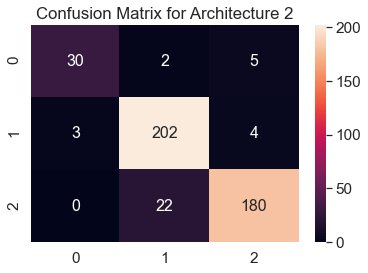

In [34]:
plt.clf()
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())
test_pred = classifier.predict_generator(test_set)
predicted_classes = np.argmax(test_pred, axis=1)
cm = confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, range(3), range(3))
pd.options.display.float_format = '%d'.format
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size" : 16}, fmt='g')
plt.title("Confusion Matrix for Architecture 2")
plt.savefig("../charts/Architecture2/confusion_matrix.jpg")

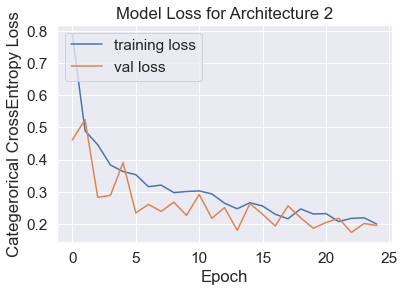

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Categerorical CrossEntropy Loss')
plt.title('Model Loss for Architecture 2')
plt.legend(['training loss', 'val loss'], loc='upper left')
plt.savefig('../charts/Architecture2/train_validation_loss.jpg')

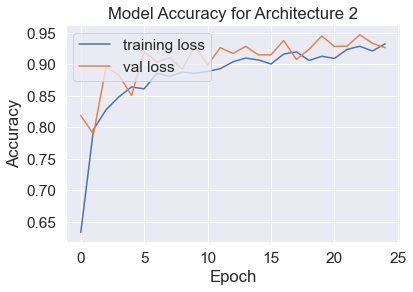

In [50]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy for Architecture 2')
plt.legend(['training loss', 'val loss'], loc='upper left')
plt.savefig('../charts/Architecture2/train_validation_acc.jpg')

In [49]:
from sklearn.metrics import classification_report
classification_report = classification_report(true_classes, predicted_classes)
print(classification_report)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        37
           1       0.89      0.97      0.93       209
           2       0.95      0.89      0.92       202

    accuracy                           0.92       448
   macro avg       0.92      0.89      0.90       448
weighted avg       0.92      0.92      0.92       448



In [59]:
classifier = Sequential()
classifier.add(Conv2D(filters=32, kernel_size=(6, 6), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(3, 3)))
classifier.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(3, 3)))
classifier.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(3, 3)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(rate=0.25))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(rate=0.25))
classifier.add(Dense(units=3, activation='softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
history3 = classifier.fit_generator(training_set, epochs=25, steps_per_epoch=(2056/32), validation_data=validation_set, validation_steps=436, workers=6)

Epoch 1/25
65/64 [==============================] - 266s 4s/step - loss: 0.9357 - acc: 0.4850 - val_loss: 0.8700 - val_acc: 0.7545
Epoch 2/25
65/64 [==============================] - 445s 7s/step - loss: 0.7868 - acc: 0.6467 - val_loss: 0.5807 - val_acc: 0.7775
Epoch 3/25
65/64 [==============================] - 236s 4s/step - loss: 0.5750 - acc: 0.7669 - val_loss: 0.3440 - val_acc: 0.8627
Epoch 4/25
65/64 [==============================] - 230s 4s/step - loss: 0.4700 - acc: 0.8072 - val_loss: 0.3187 - val_acc: 0.8972
Epoch 5/25
65/64 [==============================] - 3868s 60s/step - loss: 0.4525 - acc: 0.8221 - val_loss: 0.2746 - val_acc: 0.9196
Epoch 6/25
65/64 [==============================] - 230s 4s/step - loss: 0.4214 - acc: 0.8390 - val_loss: 0.2738 - val_acc: 0.8898
Epoch 7/25
65/64 [==============================] - 231s 4s/step - loss: 0.3855 - acc: 0.8437 - val_loss: 0.2426 - val_acc: 0.9037
Epoch 8/25
65/64 [==============================] - 2944s 45s/step - loss: 0.3566